<a href="https://www.kaggle.com/code/nawarajbhujel/notebook-copy-of-competition?scriptVersionId=170105201" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Project Name: Steel Plate Defect Prediction**


Objective : To produce the prob-prediction over a given test set that maximizes auc score. 
Data Set : Steel Plate Defect Data including 27 features and 7 binary targets

# Import of Packages and Libraries 

In [1]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier,Pool
from sklearn.ensemble import VotingClassifier
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Dataset Load

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e3/sample_submission.csv
/kaggle/input/playground-series-s4e3/train.csv
/kaggle/input/playground-series-s4e3/test.csv


In [4]:
df_raw = pd.read_csv('/kaggle/input/playground-series-s4e3/train.csv')
df = df_raw.drop("id", axis=1)


# EDA

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [6]:
df_raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,19219.0,9.609000e+03,5.548192e+03,0.0000,4804.50000,9.609000e+03,1.441350e+04,1.921800e+04
X_Minimum,19219.0,7.098547e+02,5.315442e+02,0.0000,49.00000,7.770000e+02,1.152000e+03,1.705000e+03
X_Maximum,19219.0,7.538576e+02,4.998366e+02,4.0000,214.00000,7.960000e+02,1.165000e+03,1.713000e+03
Y_Minimum,19219.0,1.849756e+06,1.903554e+06,6712.0000,657468.00000,1.398169e+06,2.368032e+06,1.298766e+07
Y_Maximum,19219.0,1.846605e+06,1.896295e+06,6724.0000,657502.00000,1.398179e+06,2.362511e+06,1.298769e+07
Pixels_Areas,19219.0,1.683988e+03,3.730320e+03,6.0000,89.00000,1.680000e+02,6.530000e+02,1.526550e+05
X_Perimeter,19219.0,9.565466e+01,1.778214e+02,2.0000,15.00000,2.500000e+01,6.400000e+01,7.553000e+03
Y_Perimeter,19219.0,6.412410e+01,1.010542e+02,1.0000,14.00000,2.300000e+01,6.100000e+01,9.030000e+02
Sum_of_Luminosity,19219.0,1.918467e+05,4.420247e+05,250.0000,9848.00000,1.823800e+04,6.797800e+04,1.159141e+07
Minimum_of_Luminosity,19219.0,8.480842e+01,2.880034e+01,0.0000,70.00000,9.000000e+01,1.050000e+02,1.960000e+02


The last 7 variables are targets. Also, we have target id varaibles which we are not 
going to use here.

In [7]:
df_raw = df_raw.drop('id',axis = 'columns')

In [8]:
features_raw = df_raw.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains','Dirtiness', 'Bumps', 'Other_Faults'],axis = 'columns') ### extracting features from df_raw
## some features are binary. 
binary_columns_raw = [col for col in features_raw.columns if features_raw[col].isin([0, 1]).all()]  ## Finding the names of columns with binary value
#####binary_columns_raw  
features_binary_raw = features_raw[binary_columns_raw]   ### Data Frame with Binary columns only
features_numeric_raw = features_raw.drop(binary_columns_raw,axis = 'columns')  ### Data Frame with Numeric columns only
###features_numeric_raw
##features_numeric.shape 

In [9]:
## To check mutlicollinearity among the features.
data = features_numeric_raw.corr()

<Axes: >

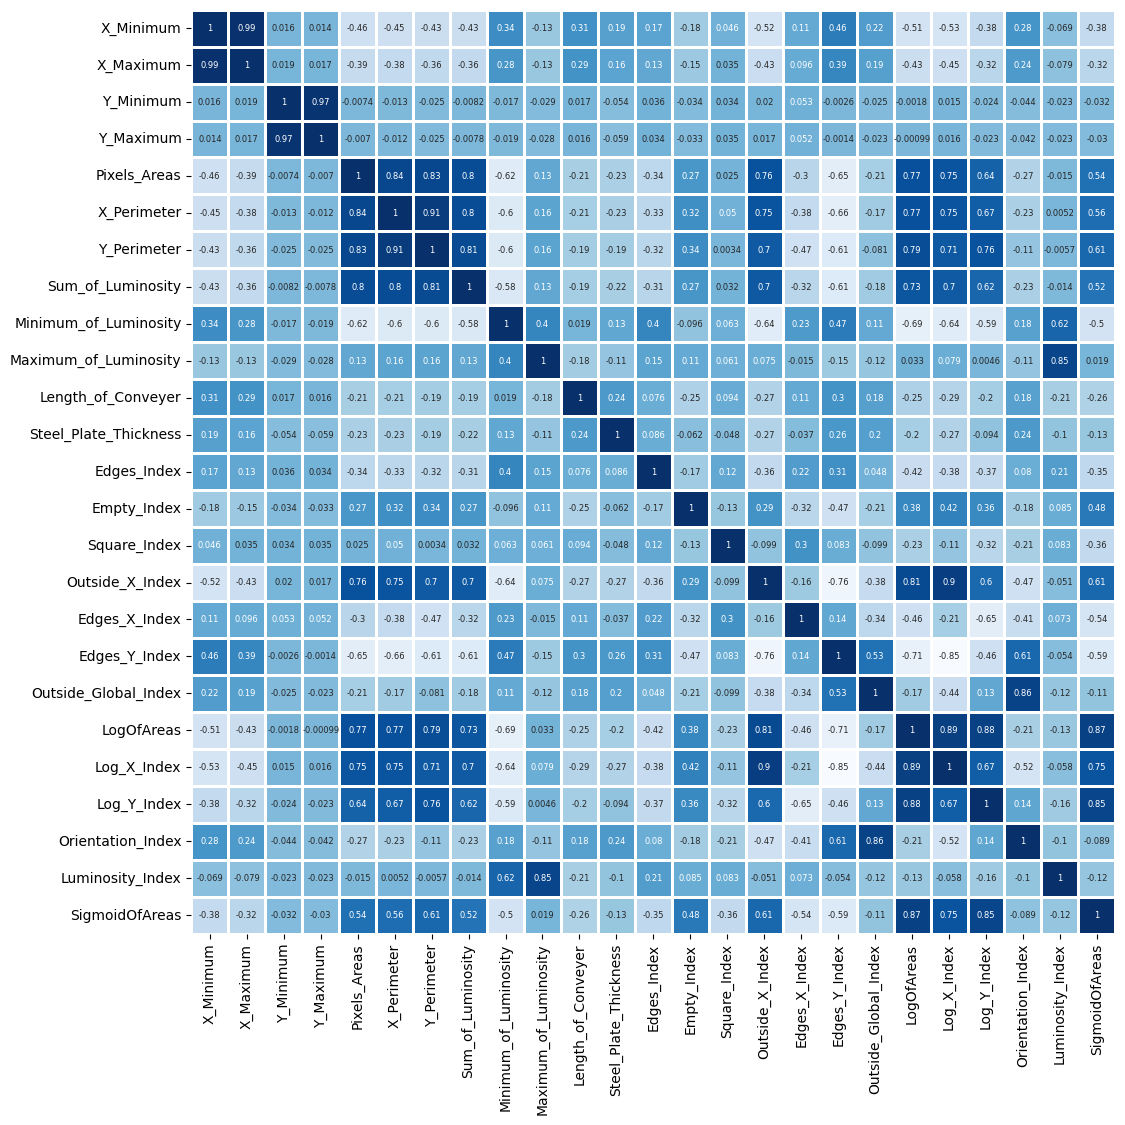

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(data,cmap='Blues',annot=True,linewidths = 1, square= True,annot_kws={"size": 6},cbar=False)

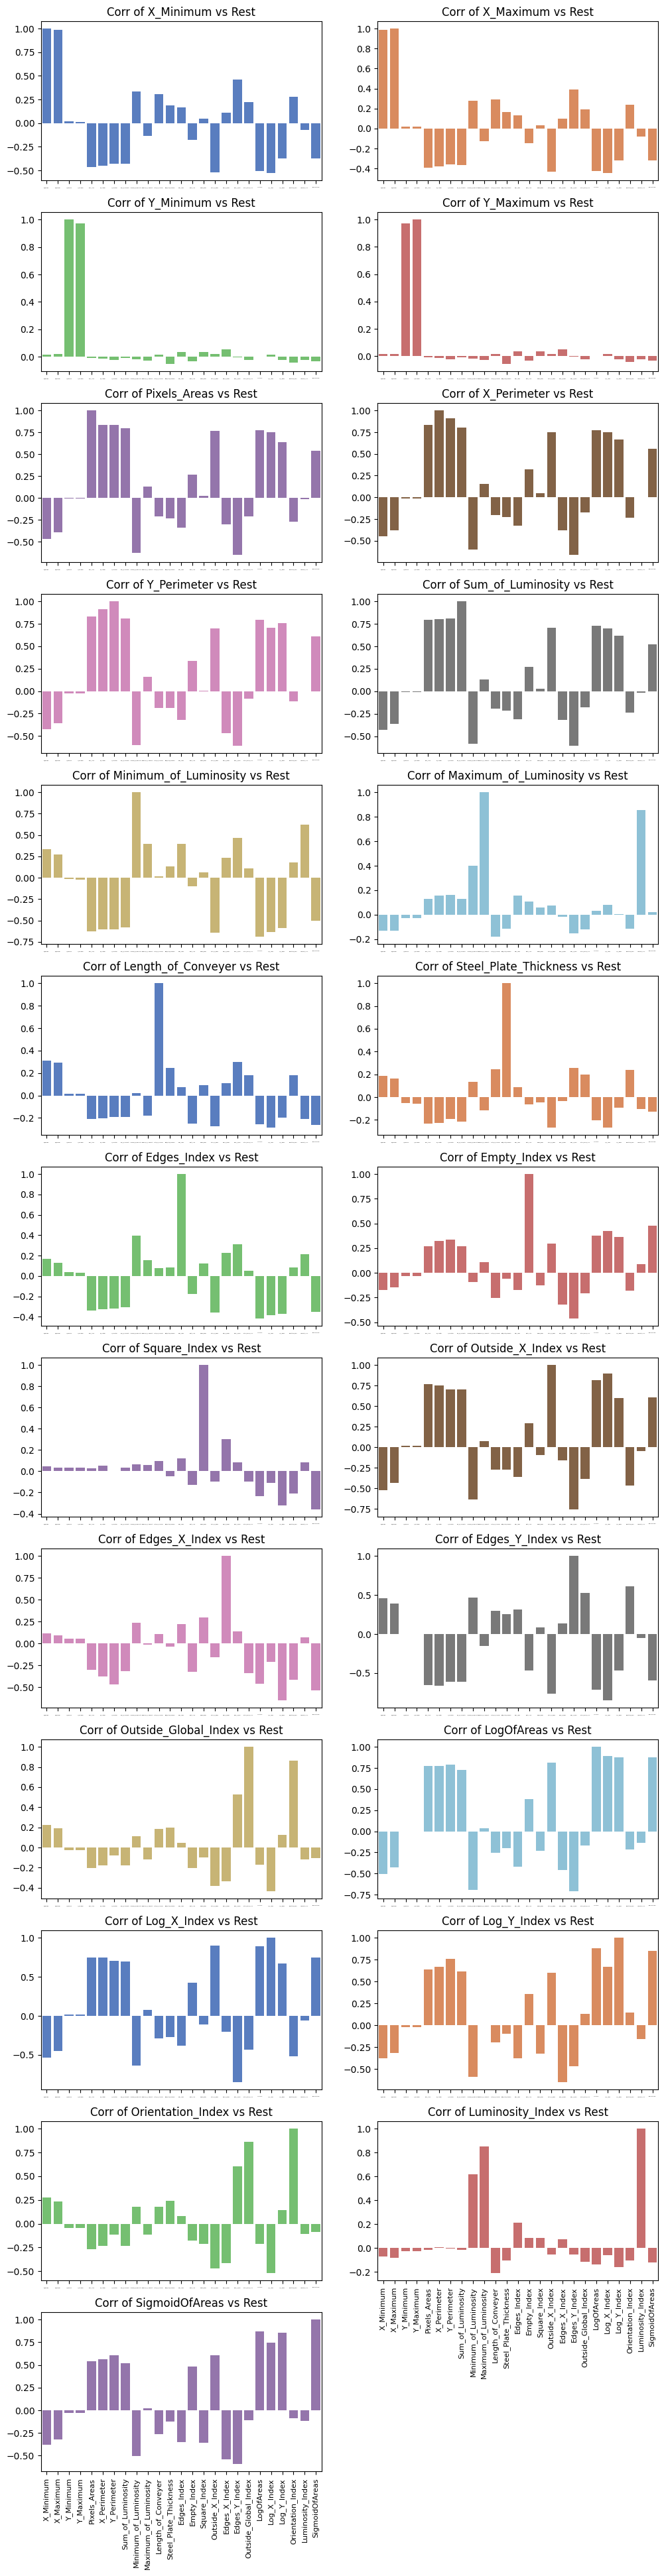

In [11]:
###Alternatiely, we can also check correlation among the features as follows.
fig = plt.figure(figsize=(12,48))
x = sns.color_palette('muted',n_colors = 25)
for i in range(0,len(data.columns)):
    plt.subplot(13,2,i+1)
    sns.barplot(x = data.columns,y = data[data.columns[i]],color = x[i])
    plt.xticks(rotation = 0 if i<23 else 90,fontsize = 0 if i<23 else 8)
    plt.title(f'Corr of {data.columns[i]} vs Rest')
    plt.xlabel('')
    plt.ylabel('')

Note: From both correlation heatmap and the above correlation bargraph, we observed that some features are higly corrleated. Including highly correlated features may overfit models. 
Therefore, we may use some  features selection and transformation techniques like PCA. Also, 
some features have high values than other which can be managed by scaling features into appropriate boundry.

In [12]:
features = features_raw
features_name = features.columns
features_name

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object')

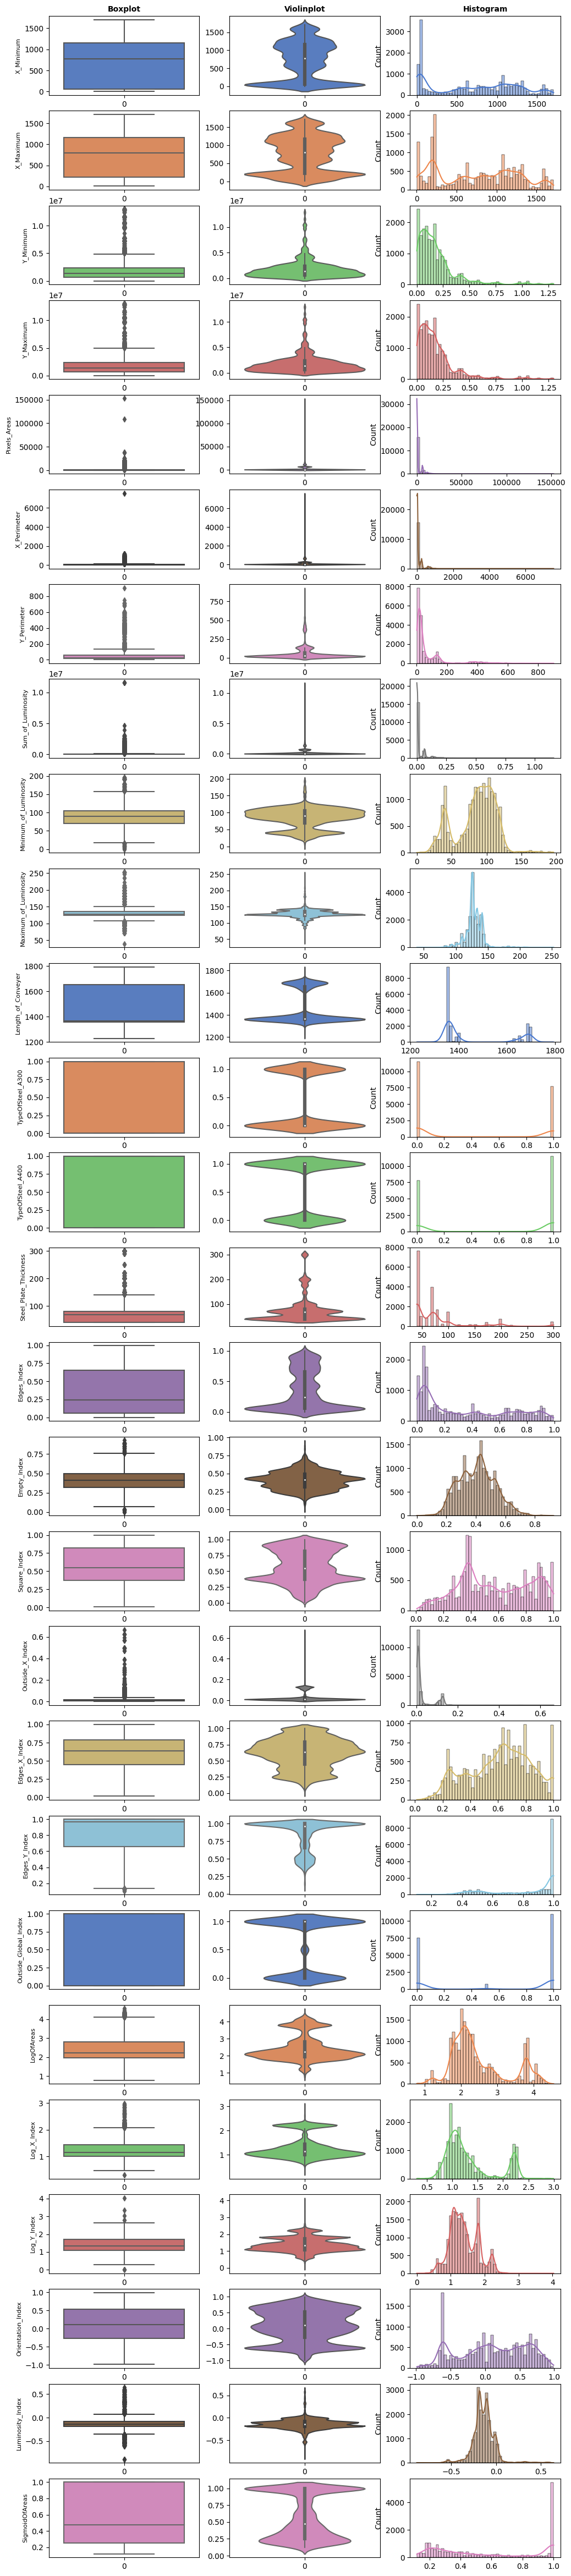

In [13]:
fig = plt.figure(figsize=(12, 60))
axs = fig.subplots(27, 3)
x = sns.color_palette('muted',27)
plot_list = ['Boxplot','Violinplot','Histogram']
for i,plotname in enumerate(plot_list):
    axs[0,i].set_title(plotname,fontsize=10,fontweight='bold')
    
for k,varname in enumerate(features_name):
    axs[k,0].set_ylabel(varname,fontsize=8)

for i,name in enumerate(features_name):
    ###axs[0,1].set_title('Voilon Plot',fontsize=10,fontweight='bold')
    ###axs[0,0].set_title('Box Plot',fontsize=10,fontweight='bold')
    ###axs[0,2].set_title('Histogram',fontsize=10,fontweight='bold')
  
    sns.boxplot(features[name],ax = axs[i,0],color=x[i]).set_xlabel('')
   
    sns.violinplot(features[name],ax = axs[i,1],color=x[i]).set_xlabel('')
  
    sns.histplot(features[name],ax = axs[i,2],kde=True,color=x[i],bins=50).set_xlabel('')

Not all features are normally distributed and some features have very long tails. These are the signs of outlier. Outlier may be genuine or comes from measurement error. At this point, 
we are not sure what to do with these. Later, we will try to check whether their presense, absence or removal can optimize our goal or not.

In [14]:
targets_raw = df_raw[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains','Dirtiness', 'Bumps', 'Other_Faults']]  ### extracting targets variables from df_raw
###targets_raw

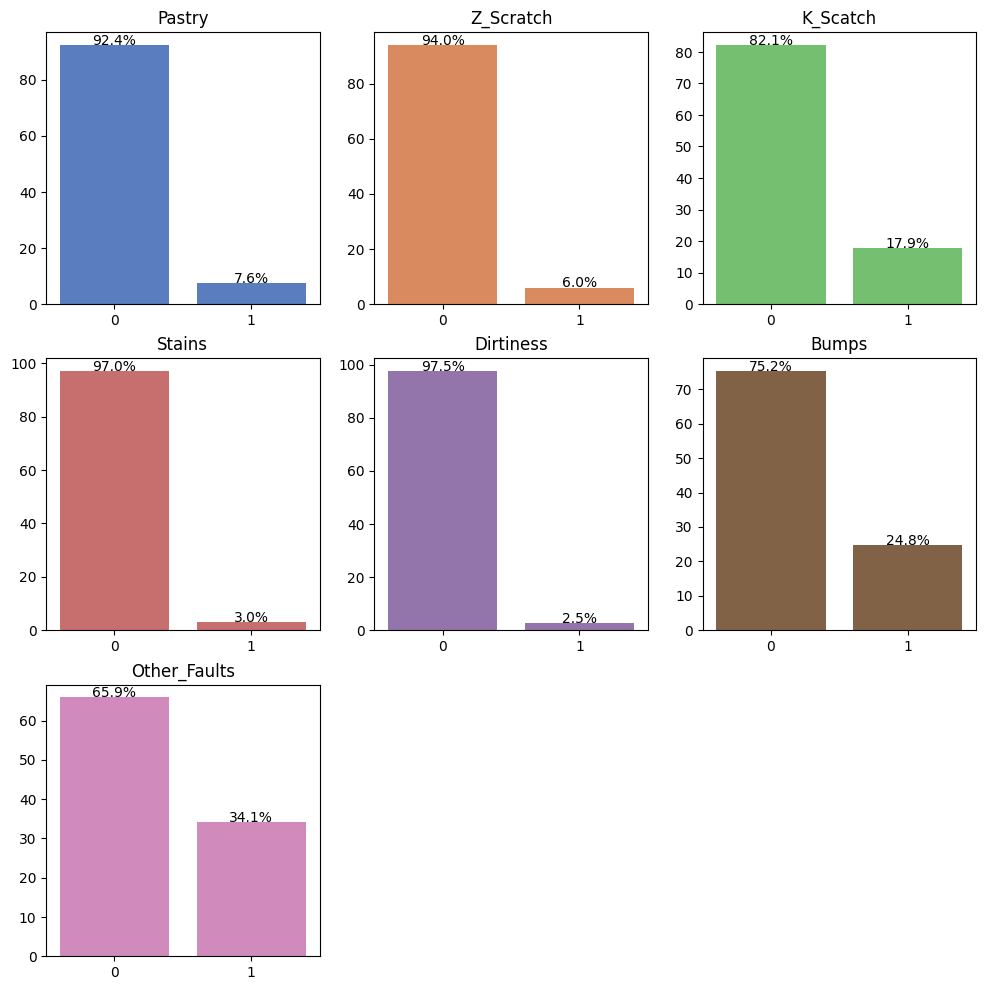

In [15]:
df_count = targets_raw.apply(lambda x: x.value_counts()/x.value_counts().sum()*100)   ### calculate % of counts in each column 
fig = plt.figure(figsize=(12,12))
col_var = sns.color_palette('muted',n_colors = 10)


for i,name in enumerate(targets_raw.columns):
    plt.subplot(3,3,i+1)
    ax = sns.barplot(x = df_count.index,y = df_count[name],color = col_var[i])
    plt.title(name)
    plt.xticks(rotation = 0)
    plt.ylabel('')
    plt.bar_label(ax.containers[0], fmt='%.1f%%', padding=-2)

# Data Upsampling
From above bar graph, it is clear that there is imbalance between non-defect(0) and defect(1), category across all seven target variable. Imbalance could be problematic. Therefore, we adopt STOME approach to upsample our minority category (defect). 

In [16]:
import imblearn
from imblearn.over_sampling import SMOTE

collection = {}
X = df_raw.iloc[:, :-7]
y = df_raw.iloc[:, -7:]
colname = y.columns
for target in colname:
    oversample = SMOTE(random_state=42)
    P, q = oversample.fit_resample(X, y[target])
    collection[target] = pd.concat([P, q], axis=1)
    

# Preminalary Model Seletion

There are bunches of algorithms for classification problems. It is difficult to foreseen which is better for this case. Therefore, the following algorithms are chosen to check which performs better. 

In [17]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  
from xgboost import XGBClassifier  
### import necessary library for model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,roc_auc_score,confusion_matrix,auc  
### create dictionary of models
model_dict = {
          'GaussianNB': GaussianNB(),
          "DecisionTreeClassifier": DecisionTreeClassifier(),
           "SVC": SVC(),
          "KNeighborsClassifier": KNeighborsClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'XGBClassifier': XGBClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'BernoulliNB': BernoulliNB()
    
         
          }

In [18]:

score_var = {}
for model_name,model in model_dict.items():
    score_dict = {}
    for target,df1 in collection.items():
        classifier = Pipeline(
            [ ('minmaxscaler', MinMaxScaler()),
             ('pca', PCA()),
             ('classifier', model)])
        auc = cross_val_score(classifier, df1.iloc[:,:-1], df1.iloc[:,-1], cv=2, scoring='roc_auc').mean()
        score_dict[target] = auc
    score_var[model_name] = score_dict
        


In [19]:
df_score = pd.DataFrame(score_var)
df_score

,GaussianNB,DecisionTreeClassifier,SVC,KNeighborsClassifier,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier,RandomForestClassifier,BernoulliNB
Pastry,0.870710,0.865796,0.959247,0.954510,0.934454,0.947716,0.978656,0.981958,0.847302
Z_Scratch,0.918346,0.920083,0.983968,0.975323,0.970922,0.976629,0.990784,0.990479,0.870842
K_Scatch,0.961184,0.934027,0.985851,0.982065,0.983025,0.986723,0.990056,0.989961,0.935999
Stains,0.981121,0.977508,0.996777,0.991597,0.995196,0.995800,0.997884,0.998075,0.967336
Dirtiness,0.879521,0.927458,0.976394,0.974468,0.951286,0.965247,0.993997,0.995095,0.826272
Bumps,0.817385,0.739209,0.886520,0.864862,0.860381,0.875329,0.897076,0.912294,0.747948
Other_Faults,0.469108,0.591019,0.623440,0.665878,0.624944,0.632541,0.653202,0.724357,0.647895


In [20]:
target = df_score.index
target

Index(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults'],
      dtype='object')

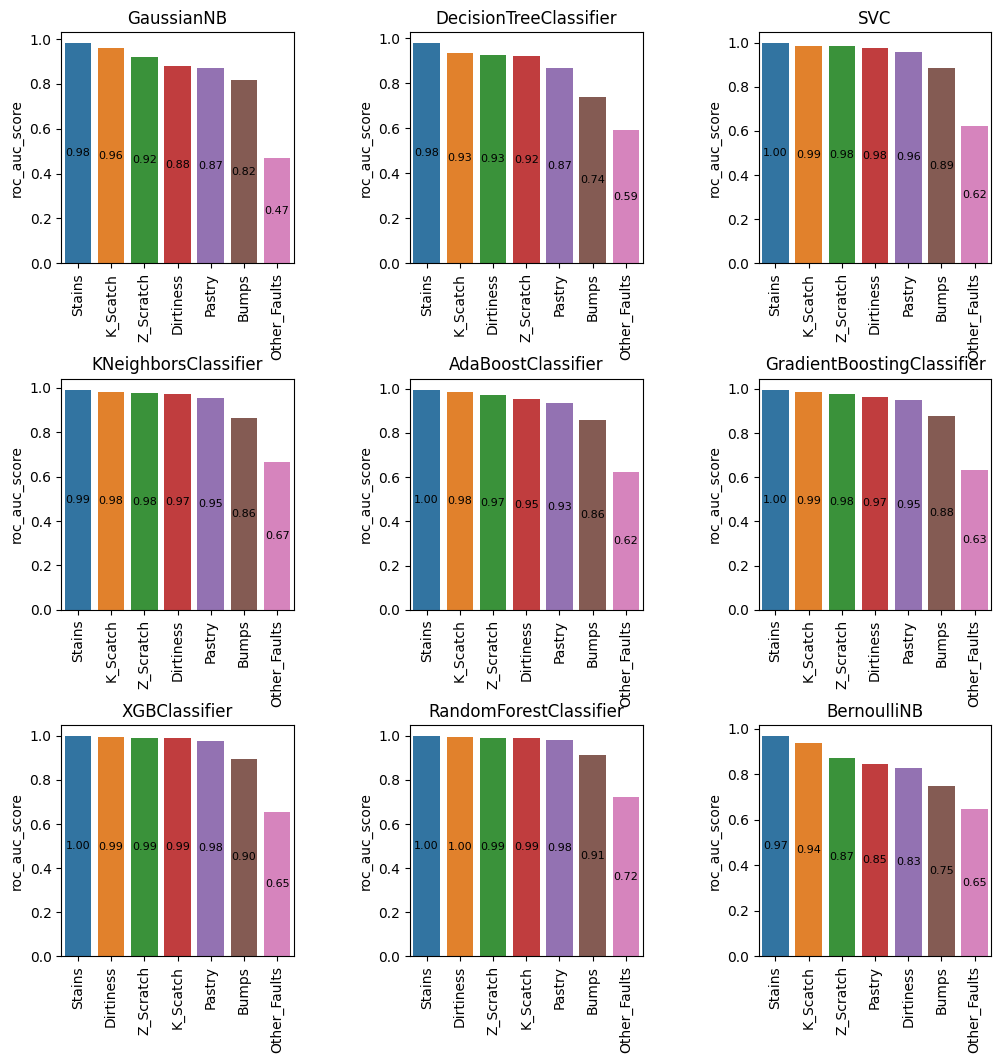

In [21]:
target = df_score.index
model = df_score.columns
fig = plt.figure(figsize = (12,12))

for i,model in enumerate(df_score.columns):
    df = df_score[model].sort_values(ascending = False)
    plt.subplot(3,3,i+1)
    sns.barplot(x = df.index,y = df.values)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.title(model)
    plt.xticks(rotation = 90)
    plt.ylabel('roc_auc_score')
    bars = plt.gca().patches
    for bar in bars:
            height = bar.get_height()
            plt.gca().annotate(f'{height:.2f}', (bar.get_x() + bar.get_width() / 2, height/2),
                               ha='center', va='center', color='black', fontsize=8)
    
  
   
   

From above bar graph of model comparison, we select XGBoost(XG) and RandomForest(RF) as our models to meet our objective. For that the following pipelines are used. Note, the selection of parameters in the XGBoost model takes several iteratives process. Optionally, we can find these parameters either by RandomizedGrid Search or Simple Grid search. We have not shown the whole process here. We adopt three approach.

# First Approach : Using Upsample Data Frame by SMOTE

In [22]:
classifier1 = Pipeline([('scaler', MinMaxScaler()),
                        ('classifier1', XGBClassifier(random_state=42,n_estimators=2200,max_depth=30,learning_rate=0.01,min_child_weight = 0.001, subsample=0.8,colsample_bytree=0.3,reg_alpha=0.07,reg_lambda=0.5))
                       ])

In [23]:
classifier2 = Pipeline([
    ('scalar', MinMaxScaler()),
    ('rfc', RandomForestClassifier(random_state = 42))

])

In [24]:
df_test_raw = pd.read_csv('/kaggle/input/playground-series-s4e3/test.csv')
test = df_test_raw.drop("id", axis=1)
index = df_test_raw['id']
index

0        19219
1        19220
2        19221
3        19222
4        19223
         ...  
12809    32028
12810    32029
12811    32030
12812    32031
12813    32032
Name: id, Length: 12814, dtype: int64

This block of code below uses upsample data and classifier1 for all seven targets variables. 
Due to low accuracy, we just comment out it. 

In [25]:
## this version of code use upsample data and classifier1 for all seven targets variables. 
## Due to low accuracy, we just comment out it. 
#score = {}
#prediction = pd.DataFrame()
#for target,df in collection.items():
    #X,y = df.iloc[:, :-1],df.iloc[:, -1]
    #model = cross_val_score(classifier1, X, y, cv=5, scoring='roc_auc')
    #print(target, model.mean())
    #score[target] = [model.mean()]
    #classifier1.fit(X,y)
    #prediction[target] = classifier1.predict_proba(test).T[1]

We apply classifier1 on Bumps and Other_Faults targets and classifier2 for rest. This technique did not so much improved in the training set. So, we also commented it out here. 

In [26]:


#score = {}
#prediction = pd.DataFrame()
#for target,df in collection.items():
    #if target=='Bumps' or 'Other_Faults':
        #X,y = df.iloc[:, :-1],df.iloc[:, -1]
       # model = cross_val_score(classifier1, X, y, cv=5, scoring='roc_auc')
        #print(target, model.mean())
        #score[target] = [model.mean()]
        #classifier1.fit(X,y)
        #prediction[target] = classifier1.predict_proba(test).T[1]
    #else:
       # X,y = df.iloc[:, :-1],df.iloc[:, -1]
       # model = cross_val_score(classifier2, X, y, cv=5, scoring='roc_auc')
        #print(target, model.mean())
        #score[target] = [model.mean()]
        #classifier2.fit(X,y)
       # prediction[target] = classifier2.predict_proba(test).T[1]
        

Overfitting problem

# Second Approach: Robust Scaler to Handel Outlier  

In [27]:
#from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
#scaler = RobustScaler()

# Fit the scaler to your data
#scaler.fit(df)

# Transform the data with lower weight to outliers
#df_scaled = scaler.transform(df)
#df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [28]:
#import imblearn
#from imblearn.over_sampling import SMOTE,ADASYN

#collection = {}
#X = df_scaled.iloc[:, :-7]
#y = df_scaled.iloc[:, -7:]
#colname = y.columns
#for target in colname:
    #oversample = ADASYN(random_state=42)
    #P, q = oversample.fit_resample(X, y[target])
    #collection[target] = pd.concat([P, q], axis=1)

In [29]:
#score = {}
#prediction = pd.DataFrame()
#for target,df in collection.items():
    #X,y = df.iloc[:, :-1],df.iloc[:, -1]
    #model = cross_val_score(classifier, X, y, cv=5, scoring='roc_auc')
    #print(target, model.mean())
    #score[target] = [model.mean()]
    #classifier.fit(X,y)
    #prediction[target] = classifier.predict_proba(test).T[1]

Overfitting Problem

# Third Approach: Default Data

In [30]:
df

Stains          0.967336
K_Scatch        0.935999
Z_Scratch       0.870842
Pastry          0.847302
Dirtiness       0.826272
Bumps           0.747948
Other_Faults    0.647895
Name: BernoulliNB, dtype: float64

In [31]:
df_raw = pd.read_csv('/kaggle/input/playground-series-s4e3/train.csv')
df1 = df_raw.drop("id", axis=1)

In [32]:
collection = {}
X,y = df1.iloc[:,:-7], df1.iloc[:,-7:]
for colname in y.columns:
    collection[colname] = pd.concat([X,y[colname]], axis=1)



In [33]:
collection.keys()

dict_keys(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'])

In [34]:
score = {}
prediction = pd.DataFrame()
for target,df in collection.items():
    X,y = df.iloc[:, :-1],df.iloc[:, -1]
    model = cross_val_score(classifier1, X, y, cv=5, scoring='roc_auc')
    print(target, model.mean())
    score[target] = [model.mean()]
    classifier1.fit(X,y)
    prediction[target] = classifier1.predict_proba(test).T[1]

Pastry 0.8654213248950671
Z_Scratch 0.9567063772481511
K_Scatch 0.9853319782094061
Stains 0.9928712716020204
Dirtiness 0.8896923286799767
Bumps 0.8012026484410963
Other_Faults 0.6871999435719489


In [35]:
score_estimated = pd.DataFrame(score,index = ['roc_auc']).T
score_estimated

,roc_auc
Pastry,0.865421
Z_Scratch,0.956706
K_Scatch,0.985332
Stains,0.992871
Dirtiness,0.889692
Bumps,0.801203
Other_Faults,0.687200


In [36]:
predicted_value = prediction.set_index(index)
predicted_value

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
id,,,,,,,
19219,0.231363,0.000018,0.000058,0.000004,0.000742,0.022638,0.348516
19220,0.046844,0.000448,0.000082,0.000011,0.008858,0.011924,0.277725
19221,0.000031,0.001749,0.002974,0.000029,0.000086,0.109626,0.233843
19222,0.009415,0.000079,0.000009,0.000021,0.000414,0.366636,0.345753
19223,0.000094,0.000074,0.000015,0.000072,0.000166,0.581159,0.133126
...,...,...,...,...,...,...,...
32028,0.009338,0.005180,0.000031,0.000005,0.000914,0.034503,0.195449
32029,0.012341,0.000130,0.000875,0.000415,0.005507,0.070117,0.259523
32030,0.000015,0.000019,0.994807,0.000008,0.000015,0.000014,0.004976


In [37]:
predicted_value.to_csv('submission.csv')